In [31]:
#Created by Ricardo Manjarrez 

This Notebook is designed for develop statistics test in the time series.

In [1]:

df=pd.read_csv('Bitcoin2020.csv')


In [2]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1609459140,12/31/2020 23:59,BTC/USD,28982.44,29024.59,28969.83,28992.79,5.897679,170990.18290
1,1609459080,12/31/2020 23:58,BTC/USD,29044.79,29048.62,29000.12,29000.12,20.362289,590508.83780
2,1609459020,12/31/2020 23:57,BTC/USD,29039.53,29048.63,29023.26,29044.79,14.503728,421257.72150
3,1609458960,12/31/2020 23:56,BTC/USD,29052.02,29059.42,29039.28,29039.53,2.707583,78626.92585
4,1609458900,12/31/2020 23:55,BTC/USD,29036.10,29052.02,29025.78,29052.02,7.631439,221708.70540


In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

## Time series plot 

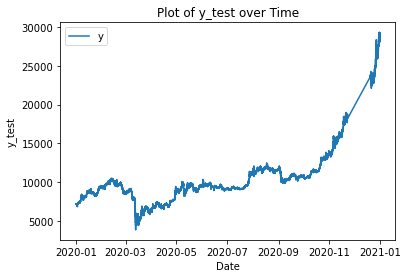

In [8]:

y = df['close']
plt.plot(df.index, y, label='y')
plt.xlabel('Date')
plt.ylabel('y_test')
plt.title('Plot of y_test over Time')
plt.legend()
plt.show()

## Partial autocorrelation and autocorrelation function (plots) 

<Figure size 864x432 with 0 Axes>

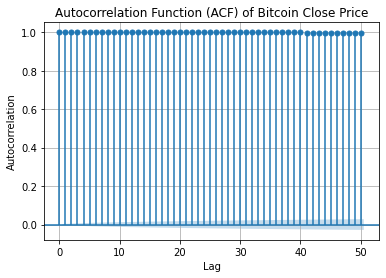

<Figure size 864x432 with 0 Axes>

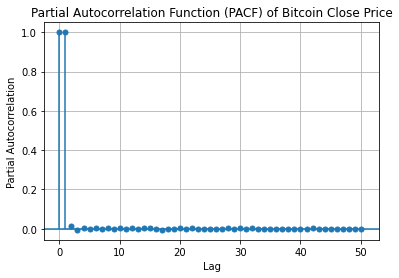

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['close'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF) of Bitcoin Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['close'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF) of Bitcoin Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


## Augmented Dickey-Fuller (ADF)  

In [30]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ADF test
def adf_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')


print('ADF Test for Close Price:')
adf_test(df['close'])


ADF Test for Close Price:
ADF Statistic: -6.8290508162081505
p-value: 1.914484757710833e-09
Critical Values:
	1%: -3.4303634106082233
	5%: -2.861545927330655
	10%: -2.5667731549016466
